# House Sales in King County, USA

## Data set

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It's a great dataset for evaluating simple regression models. The original dataset is obtained from Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In this demo, I will use various regression methods to model the house sales price and evaluate the model with test set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [2]:
# changing the max_columns value
pd.set_option("display.max_columns", None)

# set seaborn theme
sb.set_theme()

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Data Impression and Variables**

The dataset has total 21 columns and price is the analysis target.

## Exploratory Analysis

### Column statistics

In [6]:
df.describe().style.format(precision=3)  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


* There are total 21613 data points.
* House price range from 75K to 7,700K. 

### Distribution of house price

The house prices are expected to have alot of outliers. 

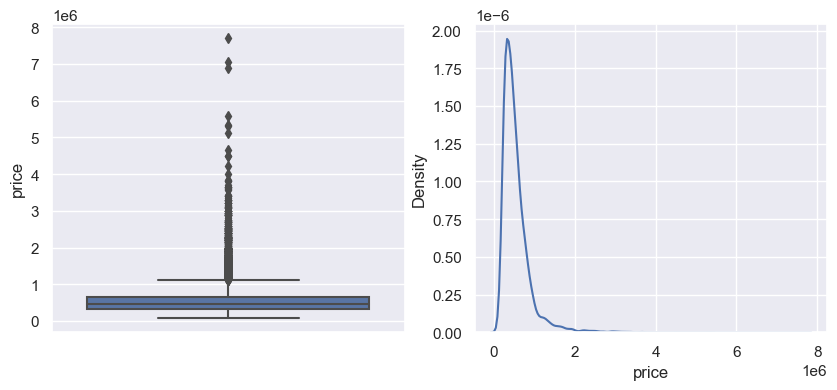

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))

sb.boxplot(y = df['price'], ax = ax[0])
sb.kdeplot(x = df['price'], ax = ax[1])

plt.show()

### Remove outliers

Calculate IQR, upper, and lower limit.\
Check fraction of the outliers and remove them.

In [8]:
# calculate quantiles and IQRs

q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
low_limit = q1 - 1.5 * iqr
up_limit = q3 + 1.5 * iqr

print('Q1 =', q1)
print('Q3 =', q3)
print('IQR =', iqr)
print('Lower Limit =', low_limit)
print('Upper Limit =', up_limit)


Q1 = 321950.0
Q3 = 645000.0
IQR = 323050.0
Lower Limit = -162625.0
Upper Limit = 1129575.0


In [9]:
# fraction of house price higher than upper limit
high_price = df['price']<up_limit
high_price.value_counts()[0]/(high_price.value_counts()[0]+high_price.value_counts()[1])

0.053023643177717114

In [10]:
# drop price highr than upper limit
df = df[high_price]
df.shape
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.046700e+04,2.046700e+04,20467.000000,20467.000000,20467.000000,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,4.603223e+09,4.769846e+05,3.329750,2.051632,1975.558167,1.461041e+04,1.476035,0.002980,0.172668,3.406361,7.530561,1708.330972,267.227195,1970.811013,74.681145,98078.555773,47.556888,-122.213265,1922.255191,12447.084526
std,2.877364e+09,2.083713e+05,0.912885,0.711906,774.833460,4.010956e+04,0.537033,0.054513,0.640950,0.647228,1.039192,727.296461,409.031661,29.160540,378.761647,53.336953,0.141038,0.142412,614.932010,26538.592250
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.131701e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.460400,-122.330000,1470.000000,5046.000000
50%,3.905082e+09,4.375000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.567000,-122.232000,1800.000000,7542.000000
75%,7.338101e+09,6.000000e+05,4.000000,2.500000,2431.000000,1.031900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2280.000000,9883.500000
max,9.900000e+09,1.127500e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


### Bedrooms
Integer range from 0 to 33

In [11]:
# define a function to plot feature vs price
def FeaturePlot(feature = None, histwidth = None , scale = 'log', bin=20):
    """
    Plot histoplot, boxplot(y = price) and scatterplot(y = price)
    :param feature: column name to plot. string
    :param histwidth: binwidth parameter in the histplot. float
    :param scale: yscale in the histplot. {'linear', 'log', 'symlog', 'logit'...}
    :param bin: if feature is numerical values bin them for box plot. integer
    :return: histoplot, boxplot, and scatterplot
    """
    
    fig = plt.figure(figsize=(25,3))
    ax1 = fig.add_subplot(1,5,1)
    ax2 = fig.add_subplot(1,5,2)
    ax3 = fig.add_subplot(1,5,3)
    ax4 = fig.add_subplot(1,5,4)
    ax5 = fig.add_subplot(1,5,5)

    # ax1: histplot
    sb.histplot(data=df, x=feature, binwidth=histwidth, ax=ax1)
    ax1.set_yscale(scale)

    # ax2: boxplot    
    if len(df[feature].unique())>bin:    # if feature is numerical values bin them for box plot
        min = df[feature].min()
        max = df[feature].max()
        base = 1 if round((max - min)/15)==0 else round((max - min)/15)
        df_bin = round(df[feature]/base)*base
        sb.boxplot(y=df['price'], x=df_bin, ax=ax2)
    else:
        sb.boxplot(data=df, y='price', x=feature, ax=ax2)
    ax2.tick_params(axis='x', rotation=45)
    
    # ax3: scatterplot  
    # sb.scatterplot(data=df, y='price', x=feature, ax=ax3)
    sb.regplot(data=df, y='price', x=feature,line_kws={'color':'black'}, scatter_kws={'alpha':0.2}, ax=ax3)
    cor = df['price'].corr(df[feature])
    ax3.set_title('Corr:'+str(cor))
    
    sb.residplot(data=df, y='price', x=feature, scatter_kws={'alpha':0.2}, ax=ax4)
    
    

    reg = LinearRegression()
    reg.fit(df[[feature]], df['price'])
    resid = df['price']-reg.predict(df[[feature]])
    sb.histplot(resid, kde=True, ax=ax5)
    ax5.set_xlim(-2000000, 2000000)
    
    
    return(plt.show(fig))


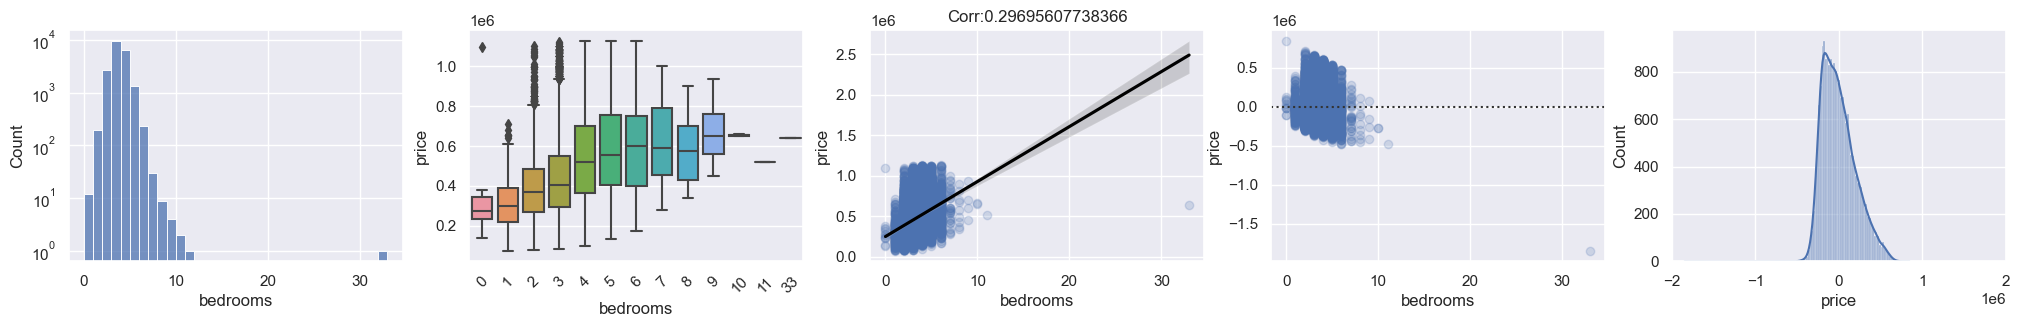

In [12]:
FeaturePlot(feature='bedrooms', histwidth=1, scale='log', bin=20)

#### Remove outlier

Remove the house with 33 bedrooms

In [13]:
df = df[df['bedrooms'] != 33]

### Bathrooms
26 unique values ranges from 0 to 7.5

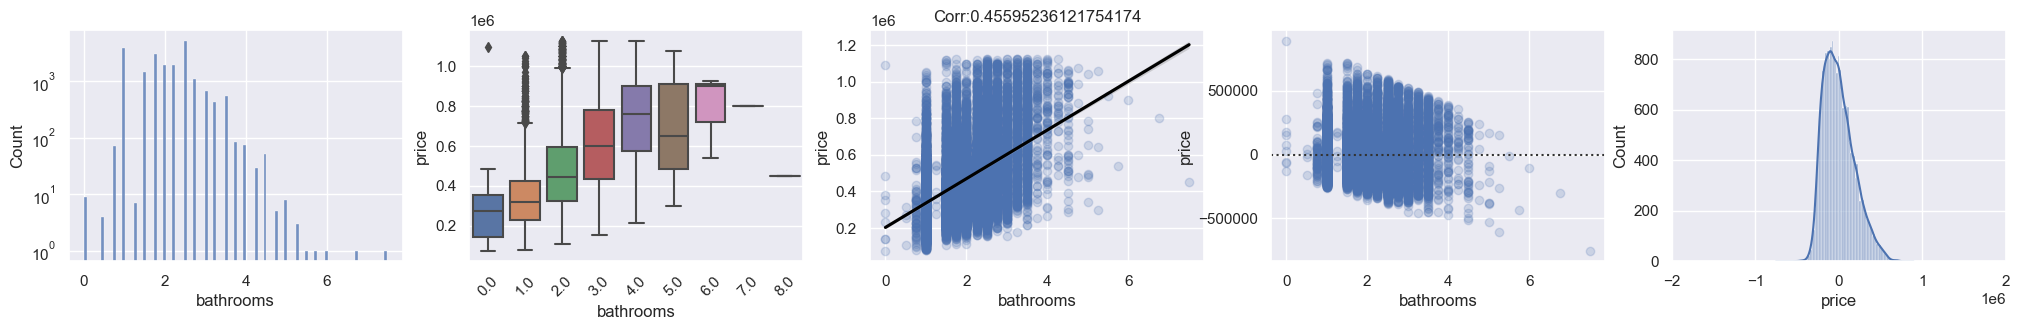

In [14]:
FeaturePlot(feature='bathrooms', histwidth=None, scale='log', bin=20)

### SQFT Living and SQFT Lot Space

There is newly measured sqft_living15 and sqft_lot15. Will not be used.

### Floors

Ranges from 1 to 3.5. 

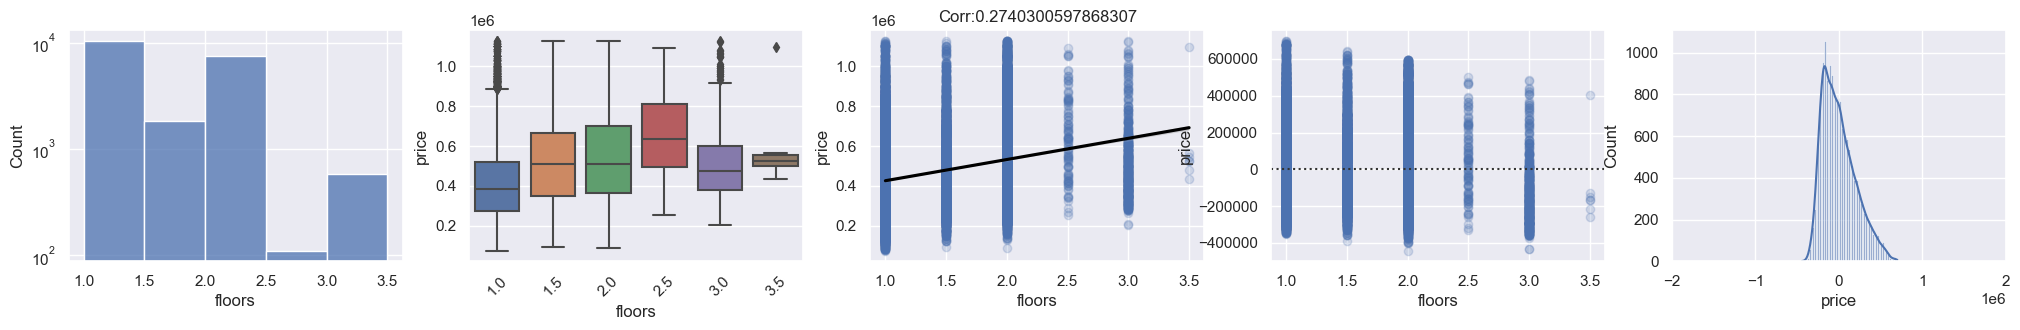

In [15]:
FeaturePlot(feature='floors', histwidth=0.5, scale='log', bin=20)

### Waterfront
Categorical value. Majority is 0. Low correlation. Will not use for model.

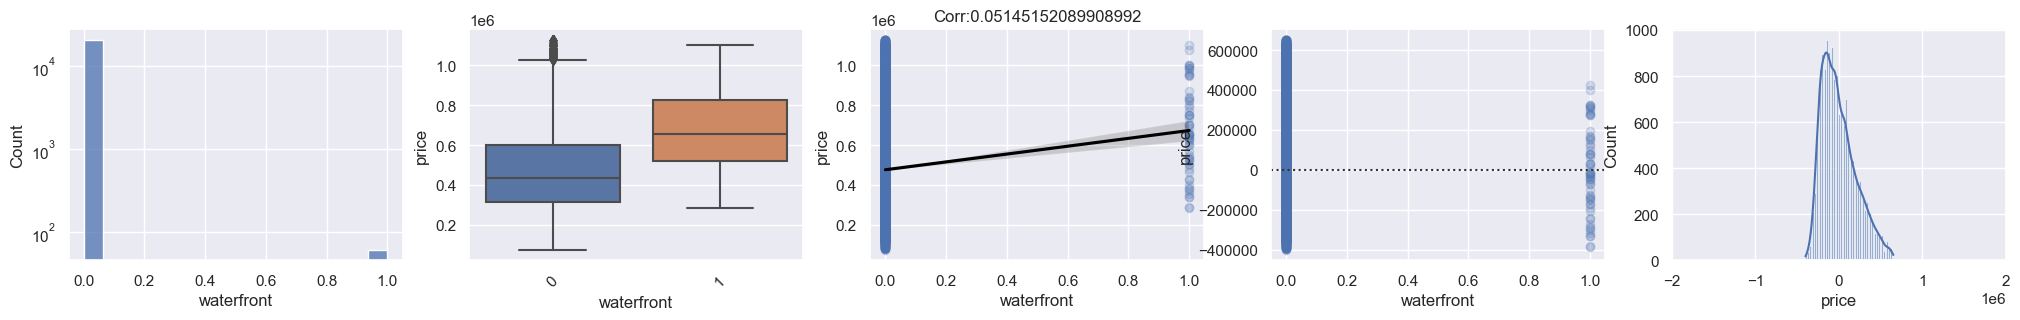

In [16]:
FeaturePlot(feature='waterfront', histwidth=None, scale='log', bin=20)

### View

Categorical value. View column is number of views of the house listed. Supposedly, view should not be a reliable independent variable. but it shows 0.24 correlation and some degree of linearity. 

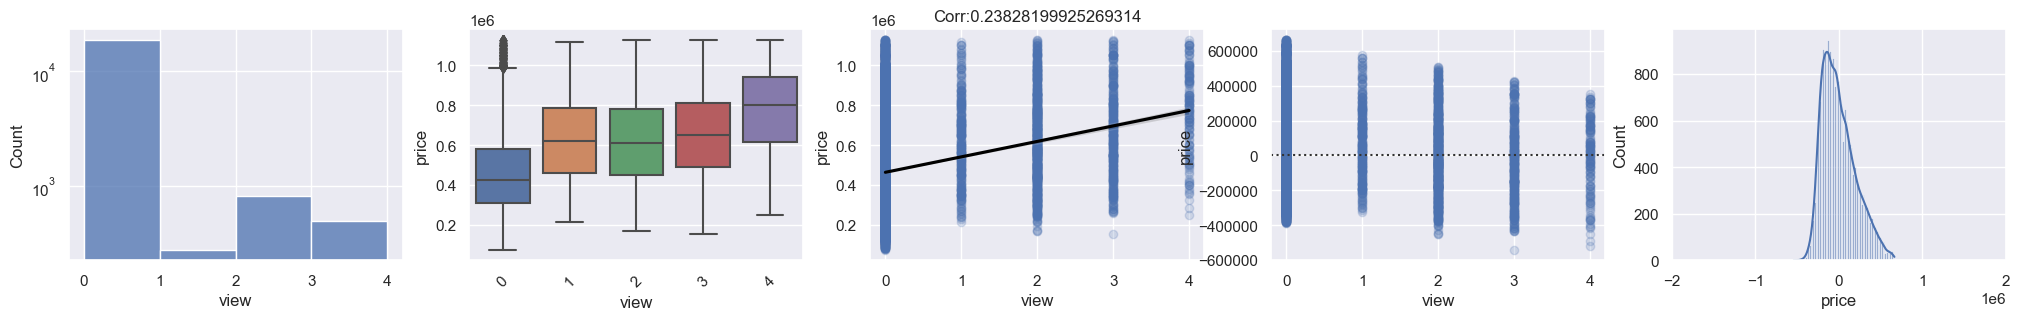

In [17]:
FeaturePlot(feature='view', histwidth=1, scale='log', bin=20)

## Condition

Catrgorical value of the house condition. Weak correlation. 

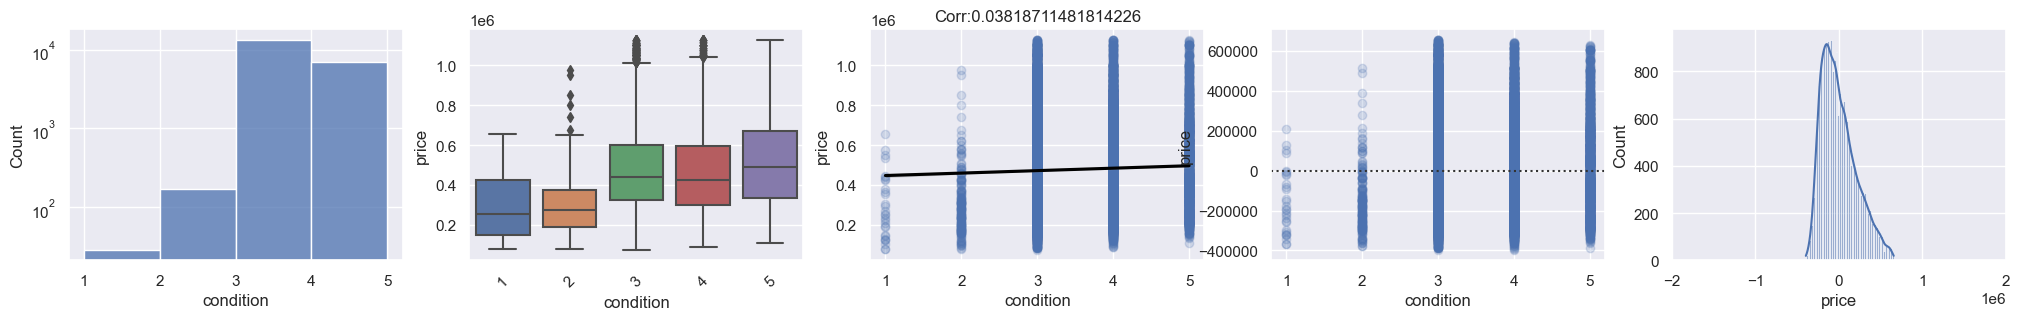

In [18]:
FeaturePlot(feature='condition', histwidth=1, scale='log', bin=20)

### Grade

Grade of the house. Shows good correlation.

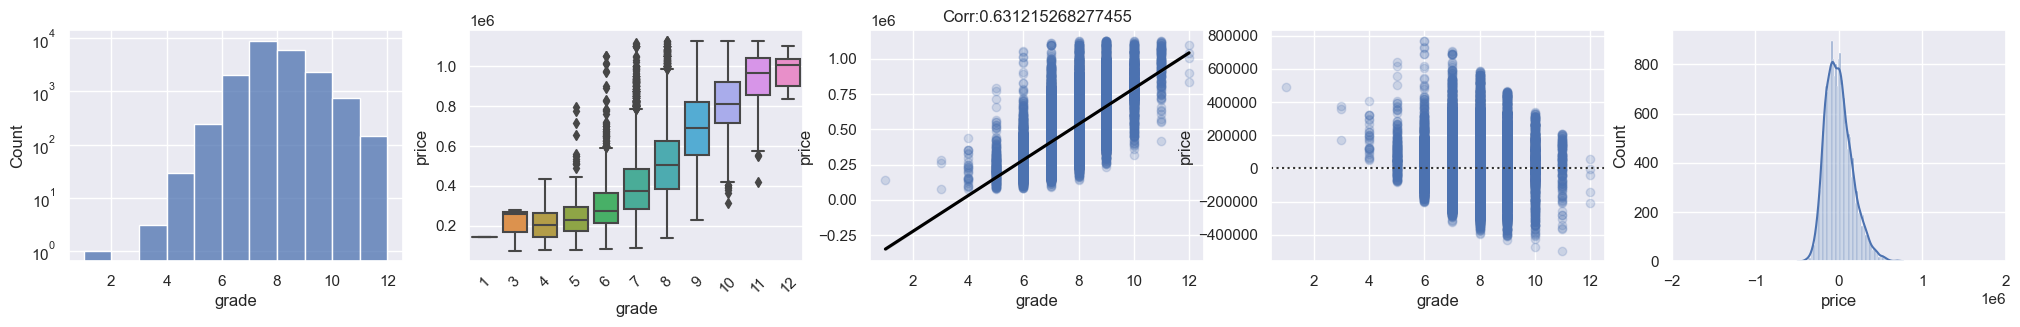

In [19]:
FeaturePlot(feature='grade', histwidth=1, scale='log', bin=20)

### Sqft_above

Shows good correlation. 

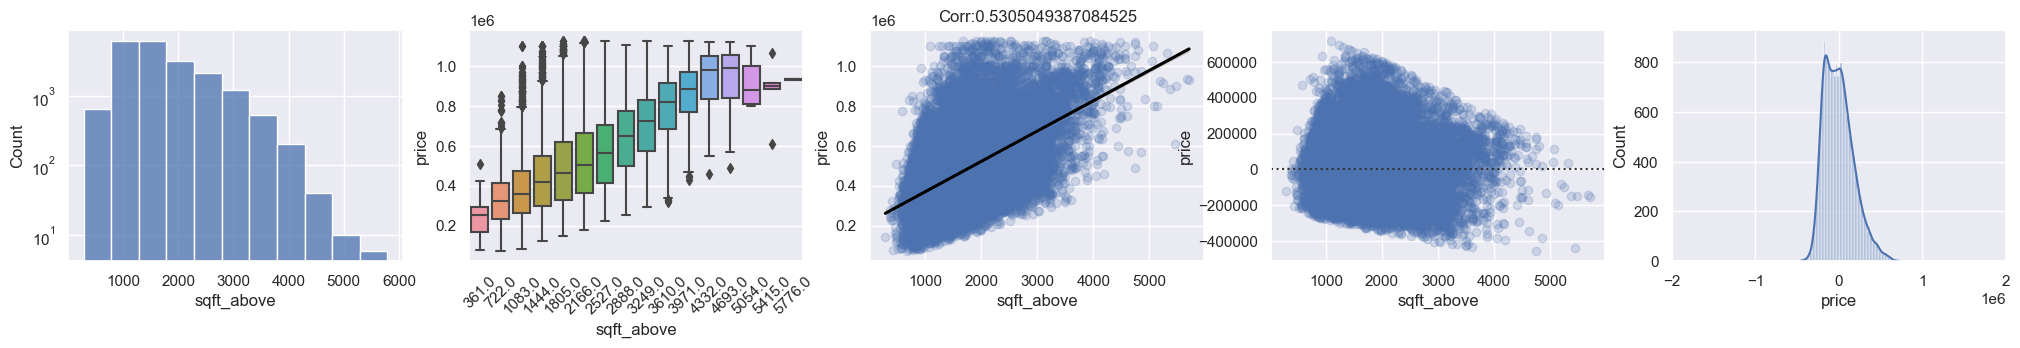

In [20]:
FeaturePlot(feature='sqft_above', histwidth=500, scale='log', bin=20)

### sqft_basement

Weak correlartion. many of them has 0 value. distribution of the residuals is not normal. Will not use for prediction.

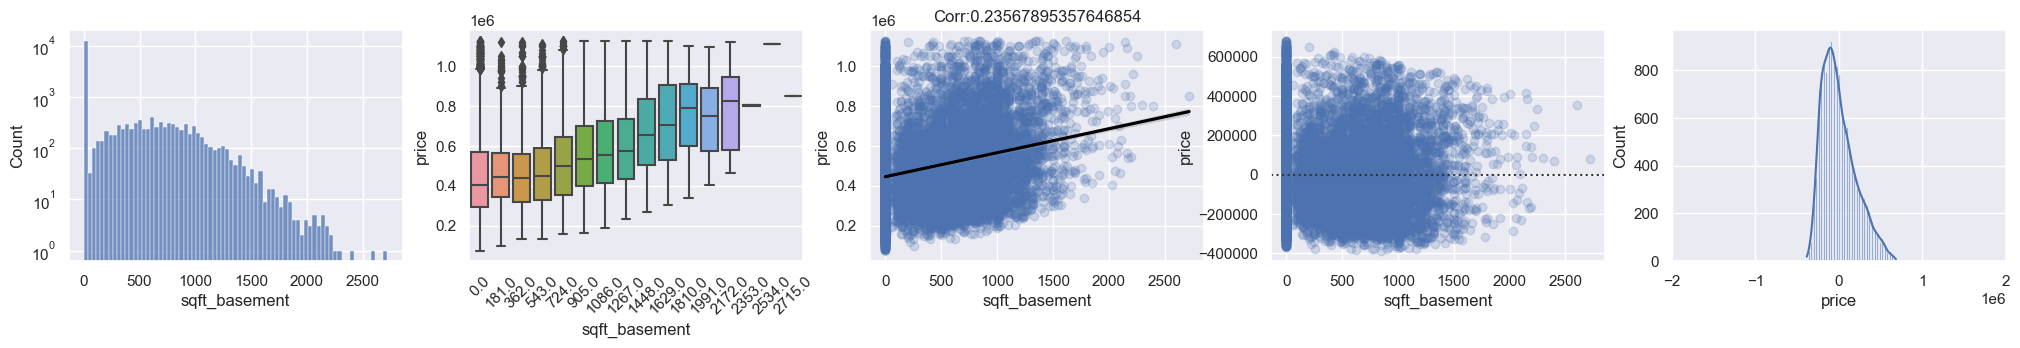

In [122]:
FeaturePlot(feature='sqft_basement', histwidth=None, scale='log', bin=20)

### yr_built

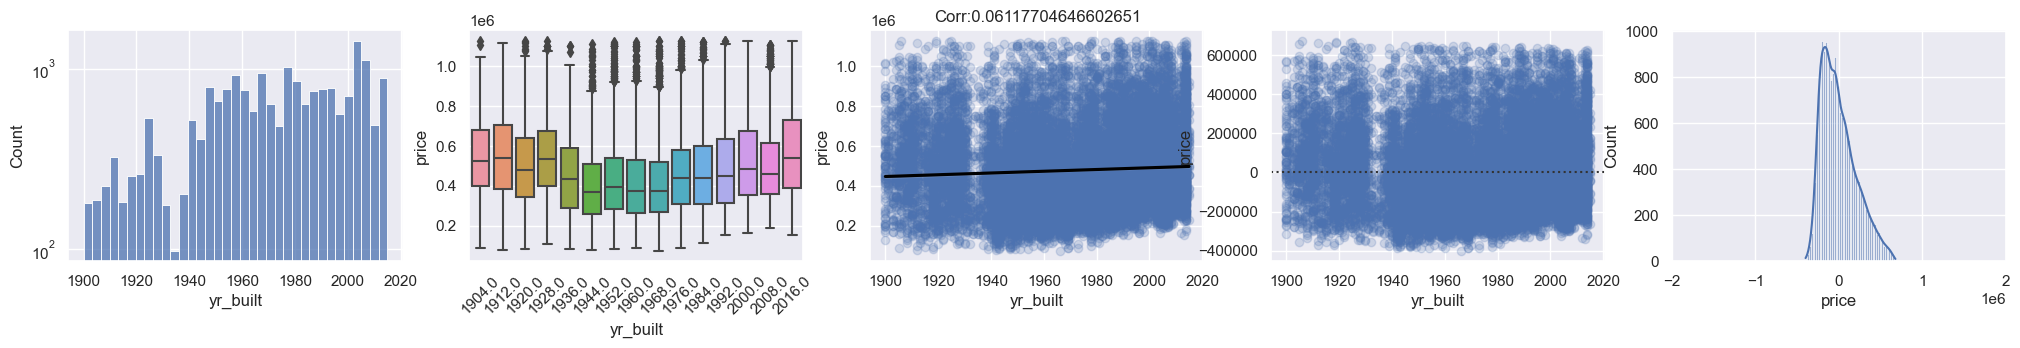

In [130]:
FeaturePlot(feature='yr_built', histwidth=None, scale='log', bin=20)

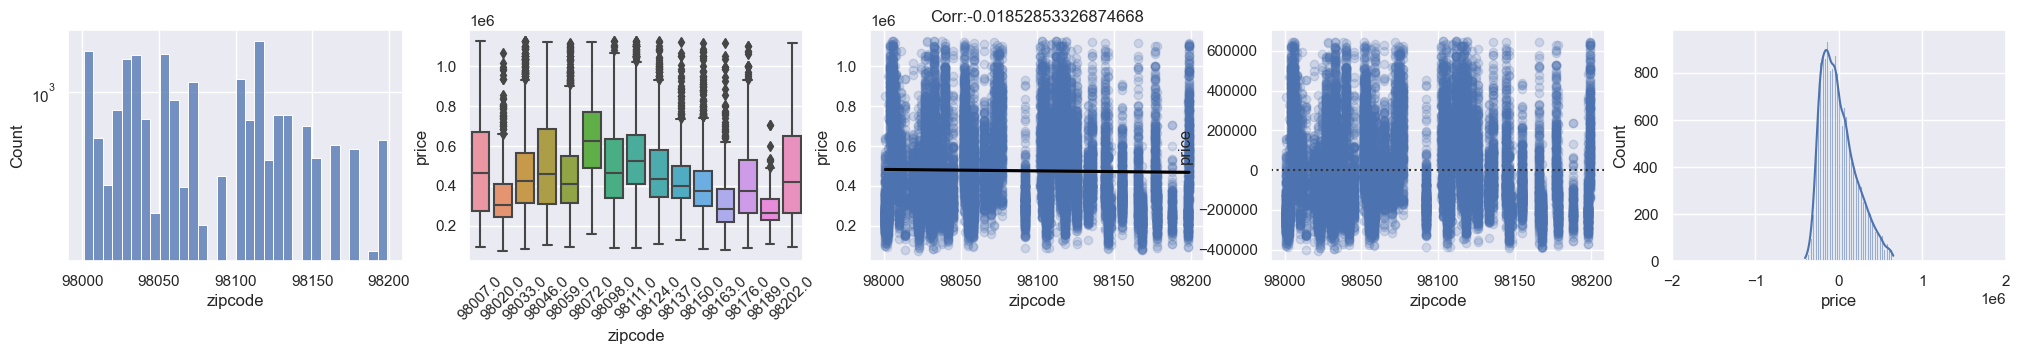

In [132]:
FeaturePlot(feature='zipcode', histwidth=None, scale='log', bin=20)

In [ ]:
yr_built	yr_renovated	zipcode